In [14]:
#importing liberary
import pandas as pd
from ThymeBoost import ThymeBoost as tb
import os

Loading Data

In [5]:
allot_data = pd.read_excel(r"C:\Users\hp\Downloads\0000\Dataset\Dataset Allot.xlsx")
allot_data

,DOCNUM,POSTING DATE,EFFECTIVE DATE,CREATE DATE,Customer/Vendor Code,Customer/Vendor Name,LOB,Region,BP TYPE,City,...,U_GRNNO,Loading/Unloading,Business Heads,KITITEM,06:57:19.838000,Customer Type,U_TRINPD,FlowName,POReference,Unnamed: 45
0,MH/271900004,2019-12-02,2019-12-02,2019-12-02,10002701,EMTD Pvt. Ltd. _ Pune,AUTO,West,RENTAL,pune,...,NaN,0.0,Amrut Dsak,KIT0000095,06:57:19.838000,Transfer Hire,NaN,COMP-EMDET-PUNE,NaN,Y
1,OR/211900001,2019-12-02,2019-12-02,2019-12-02,10002066,Unit SP Limited _ Puri _Nimapara,FMCG,East,RENTAL,Puri,...,NaN,0.0,Anuj Verma,NaN,06:57:19.838000,NaN,NaN,COMP-UNITED SPI-PURI-NIMA,NaN,Y
2,MH/271900003,2019-12-02,2019-12-02,2019-12-02,10002694,AutoIN PVT Limited _ Pune,AUTO,West,RENTAL,Pune,...,NaN,NaN,Amrut Dsak,KIT0000020,06:57:19.838000,Transfer Hire,NaN,COMP-AUTOLINE INDUST-PUNE,NaN,Y
3,HR/61900006,2019-12-02,2019-12-02,2019-12-02,10002856,AU PVT LTD._ Faridabad,AUTO,North,RENTAL,Faridabad,...,NaN,0.0,Anoop Soni,KIT0000852,06:57:19.838000,Transfer Hire,NaN,COMP-AMAR UDYOG-FARIDABAD,NaN,Y
4,TN/331900003,2019-12-02,2019-12-02,2019-12-02,10002681,Bornv pvt Ltd_ Chennai,AUTO,South,RENTAL,Chennai,...,NaN,NaN,Abhishek Jaiswal,KIT0000054,06:57:19.838000,Transfer Hire,NaN,COMP-BORGWARNER C-CHENNAI,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60169,TN22/332006596,2022-11-29,2022-11-29,2022-11-29,10002726,SUNDRY LIMITED_PLANTII _ GUMMIDIPOONDY,AUTO,South,RENTAL,Gummidipundi,...,NaN,0.0,Abhishek Jaiswal,KIT0000936,06:57:19.838000,Transfer Hire,NaN,COMP-SUNDARAM-GUMMIDIPOON,NaN,Y
60170,TN22/332006596,2022-11-29,2022-11-29,2022-11-29,10002726,SUNDRY LIMITED_PLANTII _ GUMMIDIPOONDY,AUTO,South,RENTAL,Gummidipundi,...,NaN,0.0,Abhishek Jaiswal,KIT0000784,06:57:19.838000,Transfer Hire,NaN,COMP-SUNDARAM-GUMMIDIPOON,NaN,Y
60171,MH22/272013647,2022-11-29,2022-11-29,2022-11-29,10007245,RVCJ Private Limited_Pune,AUTO,West,RENTAL,Pune,...,NaN,NaN,Amitabh Das,KIT0001068,06:57:19.838000,Transfer Hire,NaN,COMP-RVC-PUNE,NaN,Y
60172,MH22/272013671,2022-11-29,2022-11-29,2022-11-29,10002815,MT INDUSTRIES PVT LTD. UNIT_ II _ AURANGABAD,AUTO,West,RENTAL,Aurangabad,...,NaN,NaN,Amitabh Das,KIT0000634,06:57:19.838000,Transfer Hire,NaN,COMP-AKAR AUTO-AURANGABAD,NaN,Y


In [16]:
relevant_col_names = ['EFFECTIVE DATE','QUANTITY','PRODUCT CATEGORY']

In [17]:
#printing relevant_col_names 
df = allot_data[relevant_col_names]
df

,EFFECTIVE DATE,QUANTITY,PRODUCT CATEGORY
0,2019-12-02,30,Plastic Pallets
1,2019-12-02,170,Wooden Pallet
2,2019-12-02,40,Plastic Pallets
3,2019-12-02,10,Plastic Pallets
4,2019-12-02,12,Plastic Pallets
...,...,...,...
60169,2022-11-29,15,Plastic Pallets
60170,2022-11-29,2,Plastic Pallets
60171,2022-11-29,30,Plastic Pallets
60172,2022-11-29,10,Plastic Pallets


Renaming column names

In [18]:
df = df.rename(columns = {'EFFECTIVE DATE':'date', 'QUANTITY':'quantity', 'PRODUCT CATEGORY':'product_category'})
df

,date,quantity,product_category
0,2019-12-02,30,Plastic Pallets
1,2019-12-02,170,Wooden Pallet
2,2019-12-02,40,Plastic Pallets
3,2019-12-02,10,Plastic Pallets
4,2019-12-02,12,Plastic Pallets
...,...,...,...
60169,2022-11-29,15,Plastic Pallets
60170,2022-11-29,2,Plastic Pallets
60171,2022-11-29,30,Plastic Pallets
60172,2022-11-29,10,Plastic Pallets


In [19]:
required_category = 'Plastic Pallets'

In [20]:
plastic_df = df[df.product_category == required_category]
plastic_df = plastic_df.drop(['product_category'], axis = 1)
plastic_df

,date,quantity
0,2019-12-02,30
2,2019-12-02,40
3,2019-12-02,10
4,2019-12-02,12
5,2019-12-02,23
...,...,...
60169,2022-11-29,15
60170,2022-11-29,2
60171,2022-11-29,30
60172,2022-11-29,10


Grouping quantity by datewise

In [21]:
plastic_df = plastic_df.groupby('date').sum()
plastic_df

,quantity
date,
2019-12-02,587
2019-12-03,447
2019-12-04,1019
2019-12-05,661
2019-12-06,931
...,...
2022-11-24,745
2022-11-25,457
2022-11-26,619


Grouping quantity by month wise

In [22]:
plastic_df = plastic_df.resample(rule='MS').sum()
plastic_df = plastic_df.replace(0,1)
plastic_df

,quantity
date,
2019-12-01,17020
2020-01-01,18021
2020-02-01,14543
2020-03-01,9969
2020-04-01,294
2020-05-01,2315
2020-06-01,6507
2020-07-01,12531
2020-08-01,13562


Finding outliers using ThymeBoost

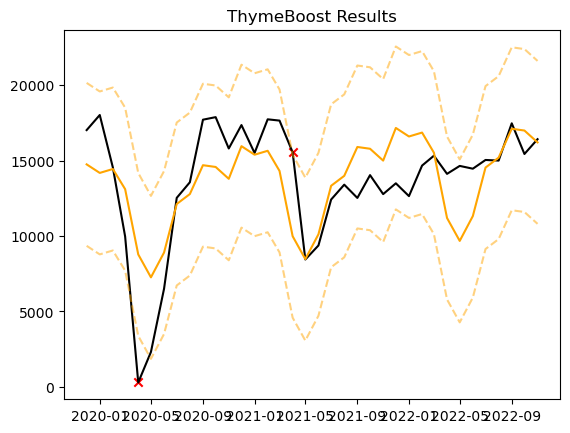

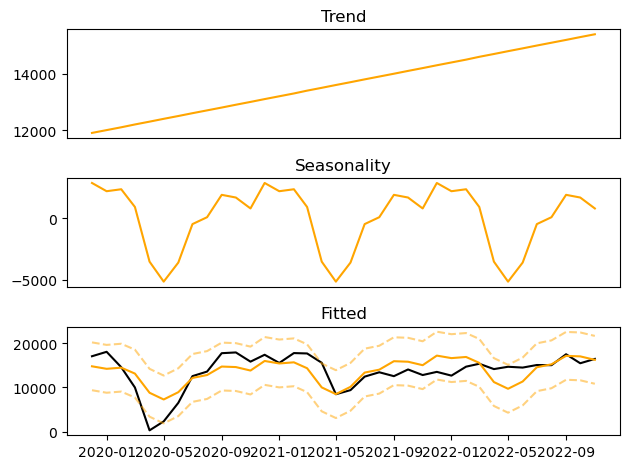

In [23]:
boosted_model = tb.ThymeBoost()
output = boosted_model.detect_outliers(plastic_df.quantity,
                                       trend_estimator='linear',
                                       seasonal_estimator='fourier',
                                       seasonal_period=12,
                                       global_cost='maicc',
                                       fit_type='global')
boosted_model.plot_results(output)
boosted_model.plot_components(output)

Removing outliers

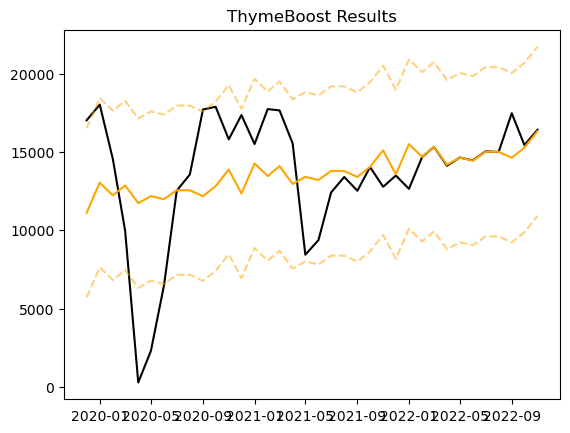

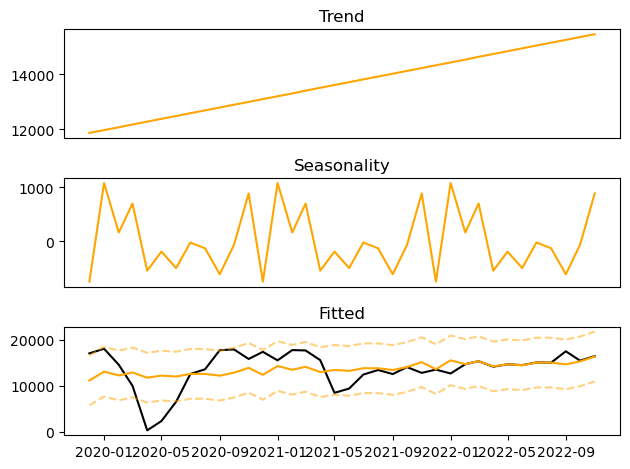

In [24]:
output = boosted_model.fit(plastic_df.quantity,
                           trend_estimator='linear',
                           seasonal_estimator='fourier',
                           seasonal_period=12,
                           global_cost='maicc',
                           fit_type='global',
                           seasonality_weights='regularize')
boosted_model.plot_results(output)
boosted_model.plot_components(output)

Taking output as yhat

In [25]:
new_plastic_df = output[['yhat']]
new_plastic_df['yhat'] = new_plastic_df.yhat.round().astype('int64')
new_plastic_df

,yhat
date,
2019-12-01,11120
2020-01-01,13043
2020-02-01,12231
2020-03-01,12868
2020-04-01,11731
2020-05-01,12185
2020-06-01,11984
2020-07-01,12559
2020-08-01,12554


renaming column names of yhat

In [26]:
new_plastic_df = new_plastic_df.rename(columns = {'yhat':'quantity'})
new_plastic_df

,quantity
date,
2019-12-01,11120
2020-01-01,13043
2020-02-01,12231
2020-03-01,12868
2020-04-01,11731
2020-05-01,12185
2020-06-01,11984
2020-07-01,12559
2020-08-01,12554


In [23]:
new_plastic_df

,quantity
date,
2019-12-01,11120
2020-01-01,13043
2020-02-01,12231
2020-03-01,12868
2020-04-01,11731
2020-05-01,12185
2020-06-01,11984
2020-07-01,12559
2020-08-01,12554


saving file as csv format

In [27]:
new_plastic_df.to_csv('cleaned_monthly_Plastic_data.csv',encoding='utf-8')
os.getcwd()

'C:\\Users\\hp\\Downloads\\1111'